In [6]:
import torch
import torchaudio
from matplotlib import pyplot as plt

import sys
sys.path.append("..")

from utils import draw_spec
import os
from IPython.display import Audio, display

def plot_signals(x, x_hat, range=[10000,15000],figsize=(10,2), diff=0.01):
    plt.figure(figsize=figsize)
    plt.plot(x, label='gt')
    plt.plot(x_hat+diff, label='s')
    plt.xlim(range)
    plt.legend()
    plt.show()
    

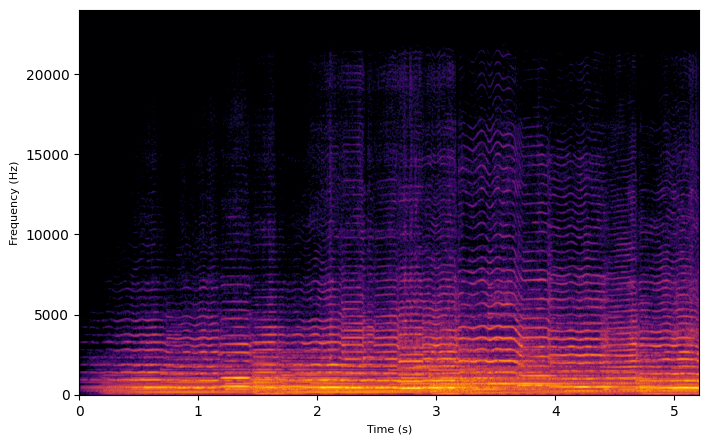

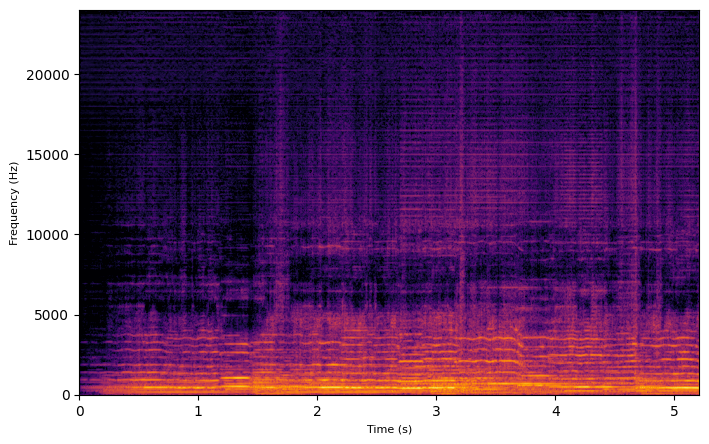

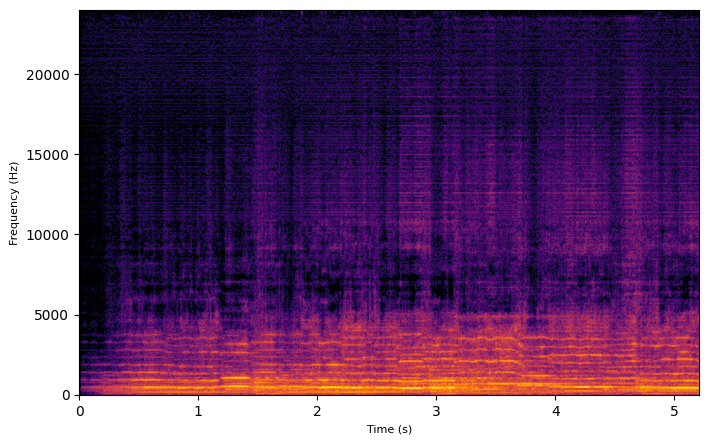

In [8]:
from pesq import pesq
from torchaudio.transforms import Resample

ref_path ='/home/woongzip/Dataset/DAPS_12_core'
# ref_path ='/home/woongzip/Dataset/DAPS_gt_small'
syn_path ='../inference/seanet/100k'
syn_path_2 ='../inference/apbwe/600k'


ref_path ='/home/woongzip/dataset_12/USAC44_12_core'
ref_path ='/home/woongzip/dataset_12/USAC44_GT'
syn_path ='../inference/seanet_audio/100k'
syn_path_2 ='../inference/abpwe_audio/600k'

wav_list = os.listdir(ref_path)

FIGSIZE = (8,5)

resampler = Resample(orig_freq=48000, new_freq=16000)
for wav in wav_list[6:]:
    y_ref, sr = torchaudio.load(os.path.join(ref_path, wav))
    y_syn, sr = torchaudio.load(os.path.join(syn_path, wav))
    y_syn2, sr = torchaudio.load(os.path.join(syn_path_2, wav))

    length = y_syn.size(1) - 400
    length = 250000
    y_ref = y_ref[..., :length]
    y_syn = y_syn[..., :length]
    y_syn2 = y_syn2[..., :length]

    _ = draw_spec(y_ref.squeeze().numpy(), sr=sr, figsize=FIGSIZE )    
    _ = draw_spec(y_syn.squeeze().numpy(), sr=sr, figsize=FIGSIZE)
    _ = draw_spec(y_syn2.squeeze().numpy(), sr=sr, figsize=FIGSIZE)
    
    display(Audio(y_ref.squeeze().numpy(), rate=sr))
    display(Audio(y_syn.squeeze().numpy(), rate=sr))
    display(Audio(y_syn2.squeeze().numpy(), rate=sr))
    
    break
    # plot_signals(y_ref.squeeze().numpy(), y_syn.squeeze().numpy(), range=[718600, 719800], diff=0.03)
    # plot_signals(y_ref.squeeze().numpy(), y_syn.squeeze().numpy(),)
    
    # print(y_syn[...,-401:])
    # print(719760 - 719360) # 400 samples are zeros 

In [ ]:
print(wav_list)